In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#import the data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [17]:
#Separate binary data
bin = df[['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]

In [18]:
bin.columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT'],
      dtype='object')

In [24]:
nb = df.drop(['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'], axis = 1)

In [26]:
nb.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


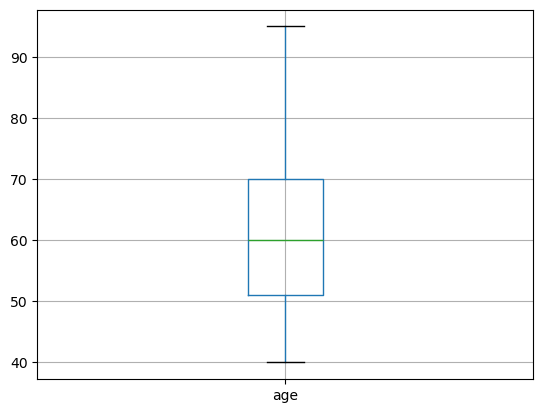

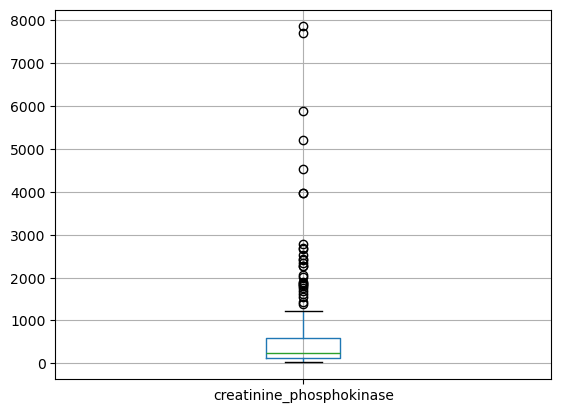

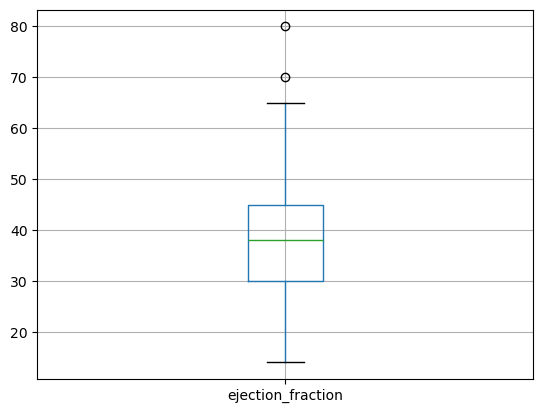

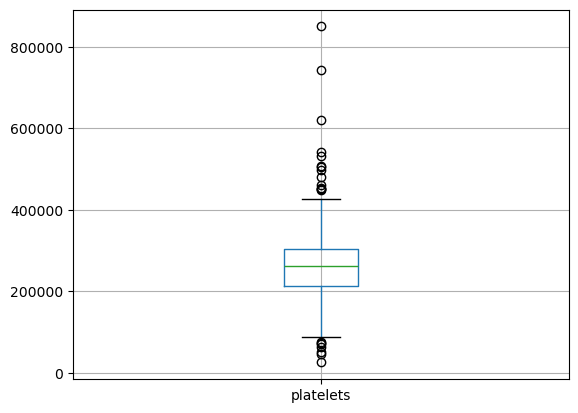

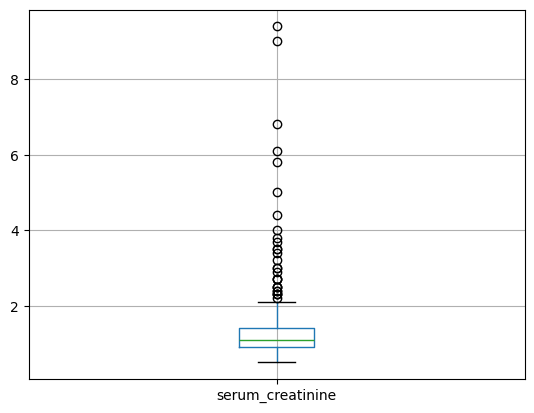

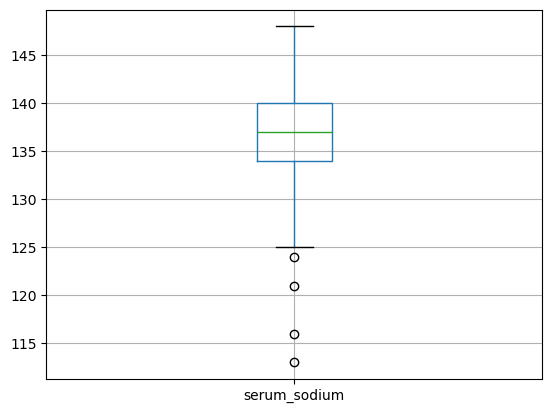

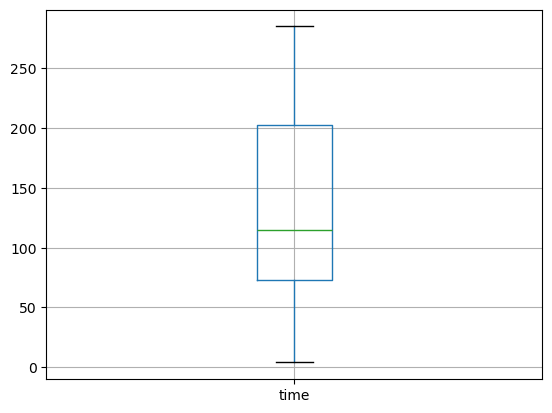

In [51]:
#Create boxplots to describe all columns that are not binary values
for column in nb:
    plt.figure()
    df.boxplot([column])

The boxplots show us that heart failure patients were ages 40-90+. Most people had creatinine phosphokinase under 1000, but some people had very highly elevated creatinine phosphokinase up to nearly 8000. Ejection fraction was pretty variable from about 15% to 65% with two data points higher than that. Most people had platelet counts between 100,000 and 400,000. Serum creatinine was usually between 0.5 and 2, with some people far higher than that. Serum sodium was generally between 125 and 150, with a few instances lower than that. Time ranged between almost 0 and nearly 300.

In [29]:
#Use summary statistics to examine binary columns.
bin.describe(include = 'all')

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


Summary statistics show us that most patients were not anemic, not diabetic, did not have high blood pressure, were not smokers, and the majority were male. About one third of patients did not survive.

Let's take a quick look at a heat map to see what's correlated with DEATH_EVENT, the variable we wish to predict.

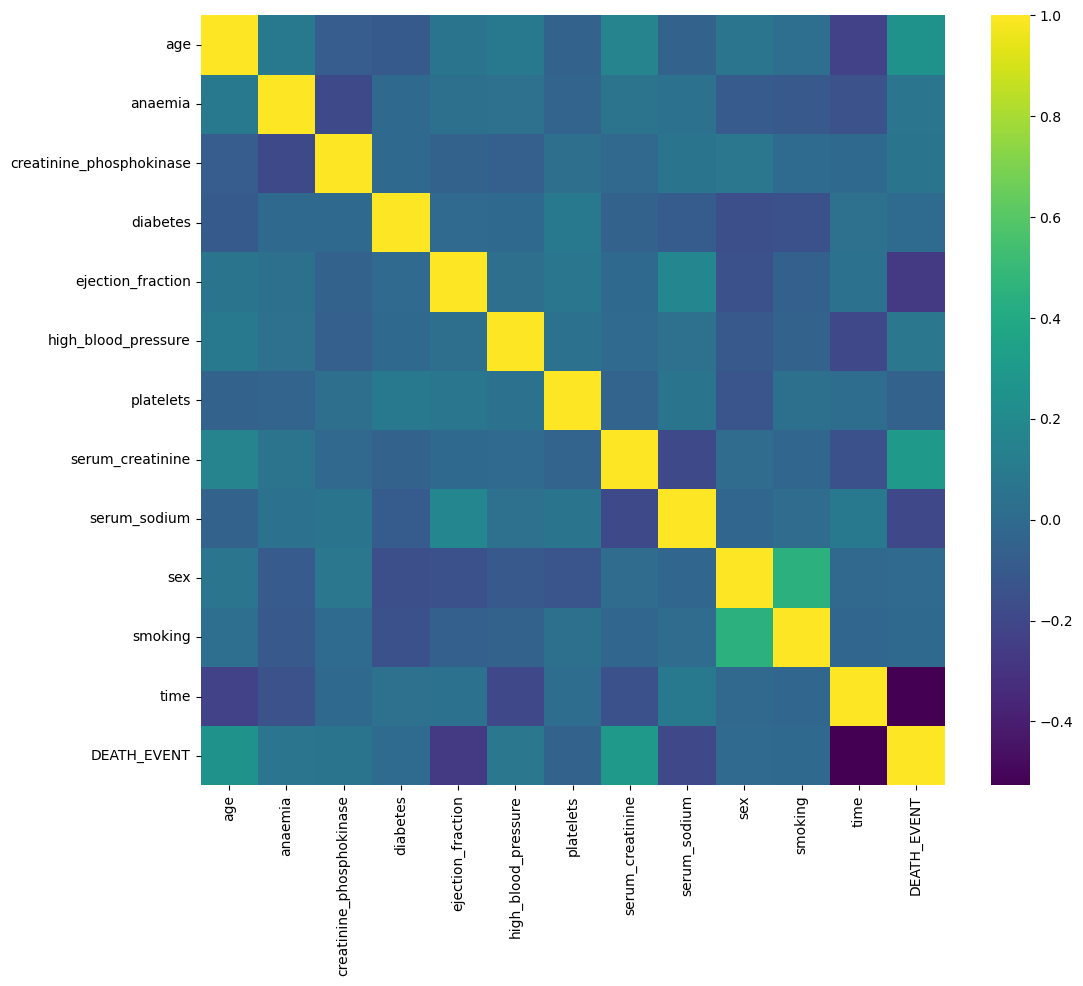

In [44]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), cmap = 'viridis');

Age and serum creatinine show the highest positive correlation with occurrence of death. Ejection fraction has a reasonably strong negative correlation (i.e., the lower the ejection fraction = the less efficient the heart is = greater chance of death), as does serum sodium. Let's take a look at a few combinations of these variables as scatter plots.

/Users/jgehring/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jgehring/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jgehring/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jgehring/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

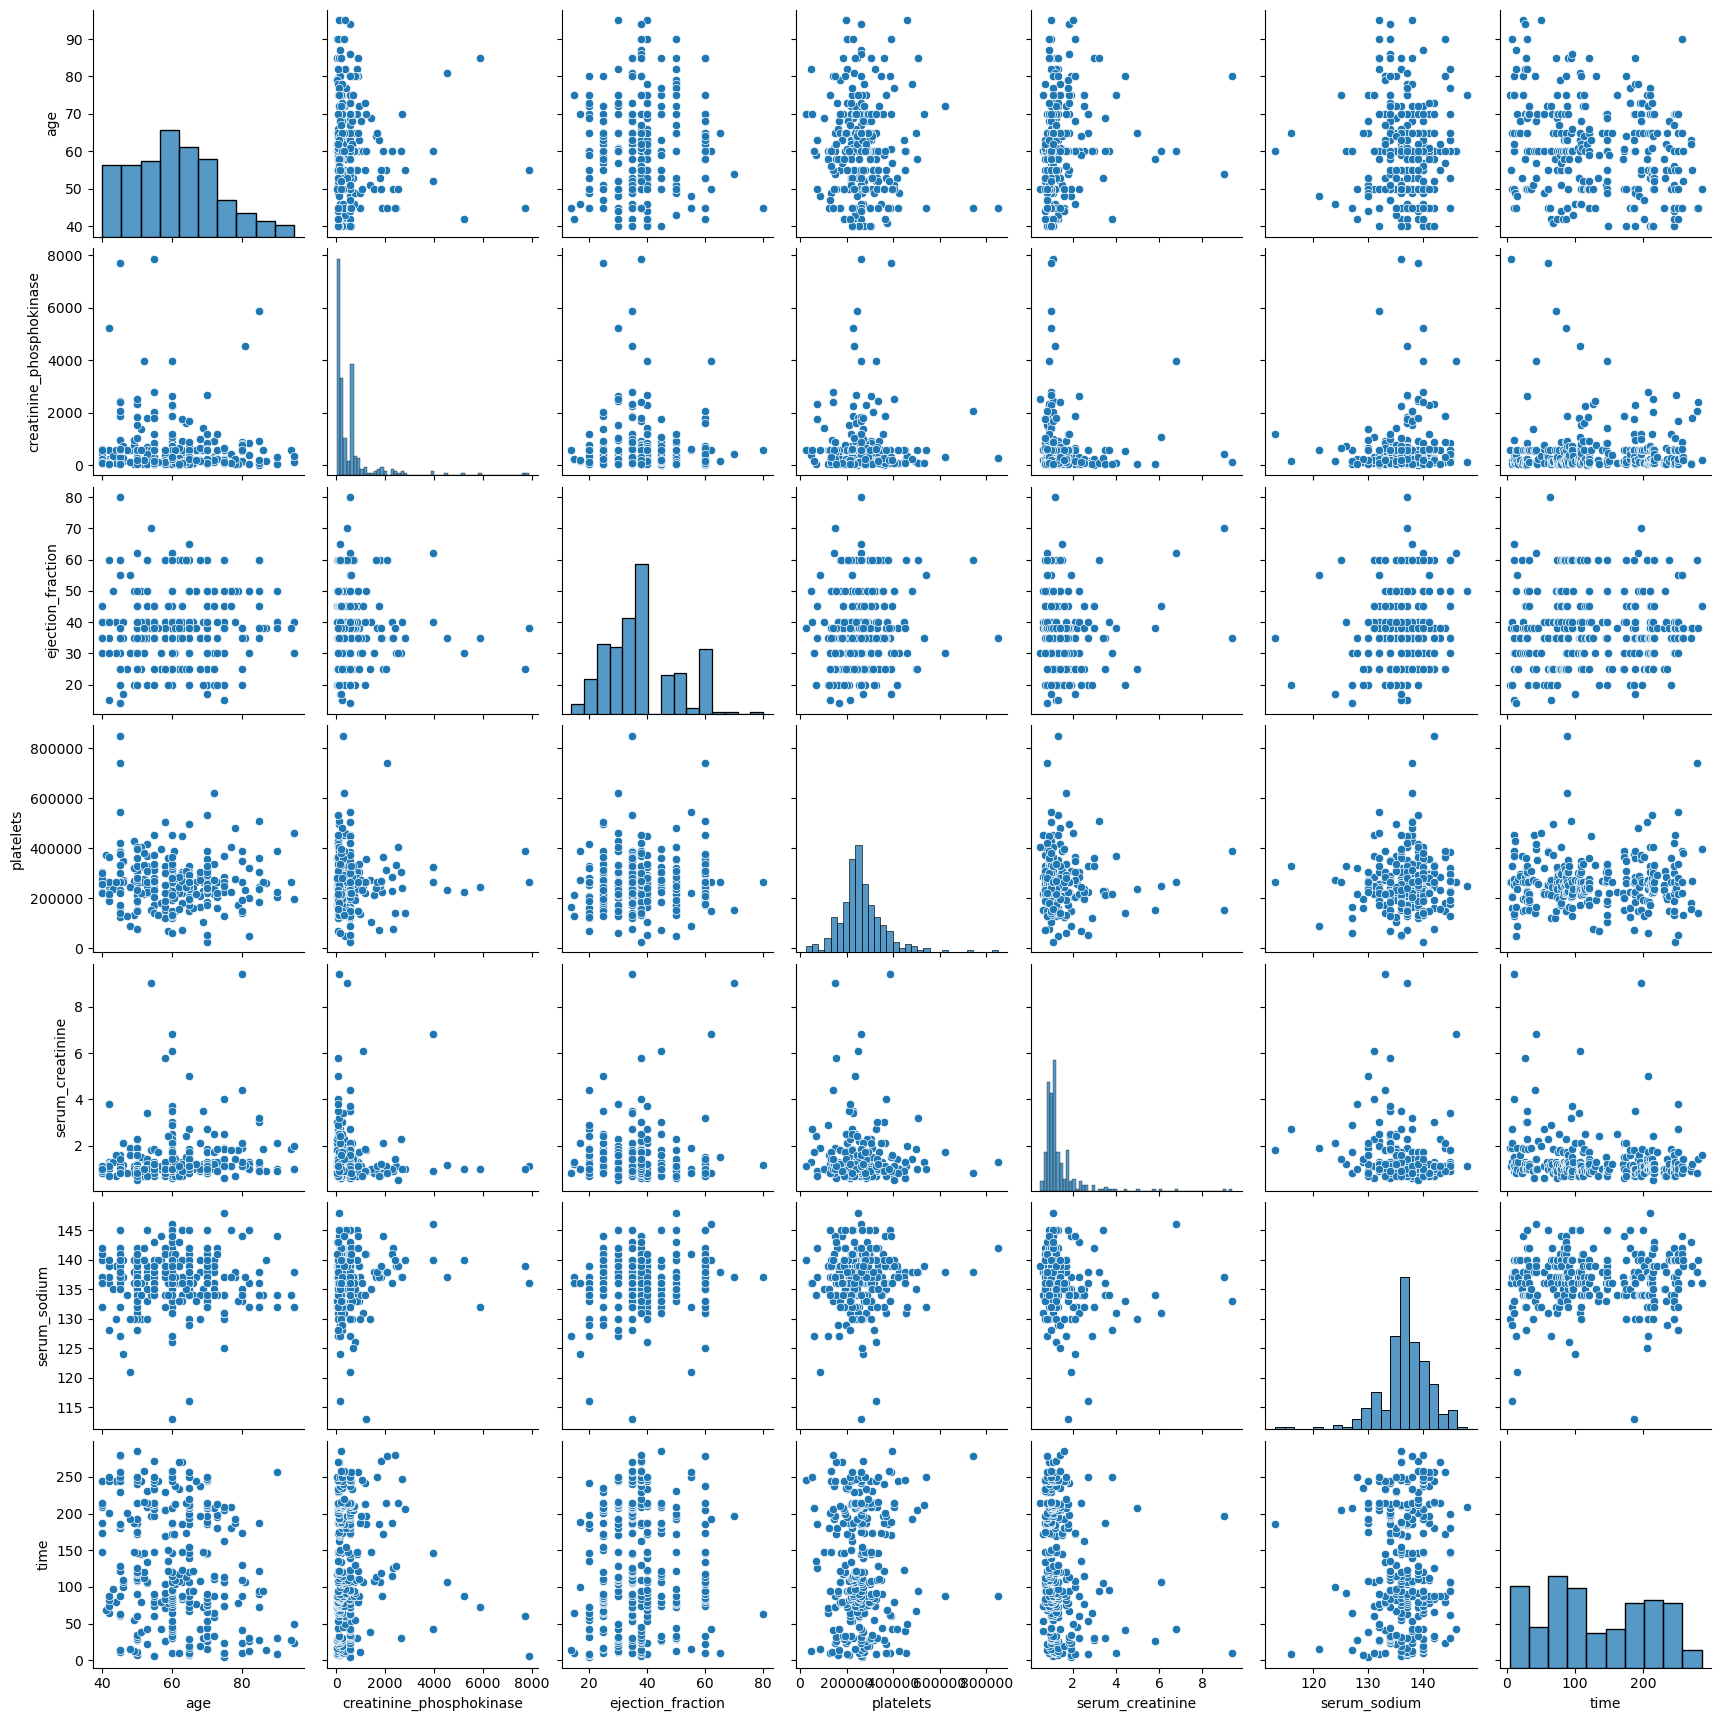

In [58]:
#Create a pairplot to check out how some of the variables interact
sns.pairplot(nb)
plt.show()

This provides a useful view of all non binary variables, their histograms, and their relationships. Let's combine this data with a label for 'DEATH_EVENT.'

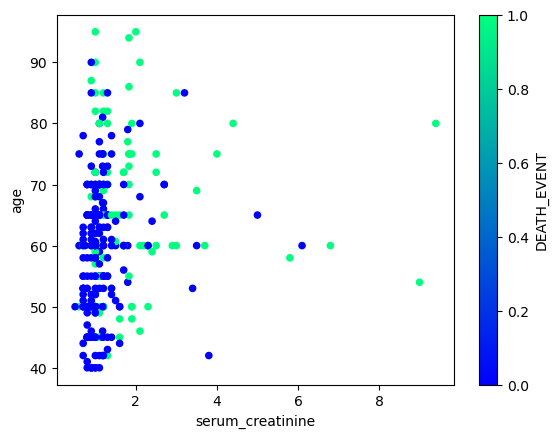

In [49]:
df.plot.scatter(x = 'serum_creatinine', y = 'age', s = None, c = 'DEATH_EVENT', colormap = 'winter')
plt.show()

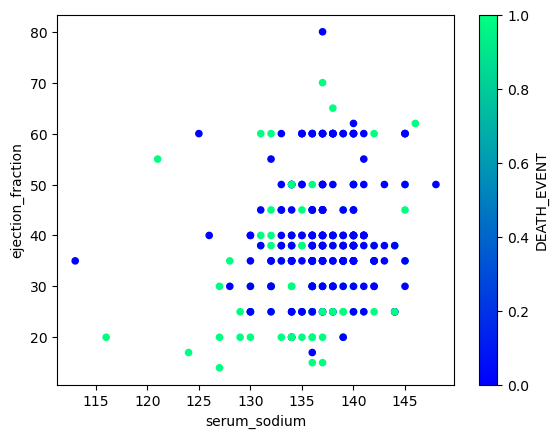

In [52]:
df.plot.scatter(x = 'serum_sodium', y = 'ejection_fraction', s = None, c = 'DEATH_EVENT', colormap = 'winter')
plt.show()

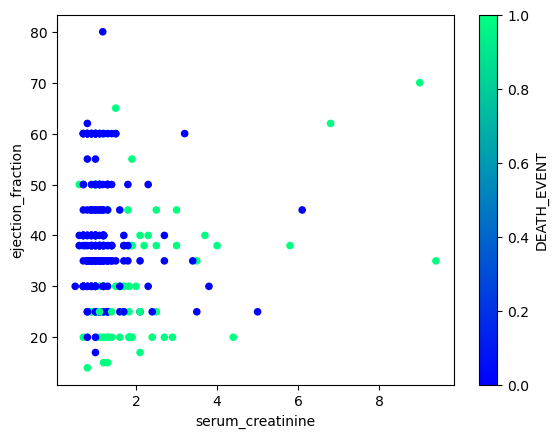

In [53]:
df.plot.scatter(x = 'serum_creatinine', y = 'ejection_fraction', s = None, c = 'DEATH_EVENT', colormap = 'winter')
plt.show()

We now have a few features in mind as possible predictors of patient death. The dataset looks clean and ready to prepare for machine learning.